In [59]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [43]:
df = pd.read_csv(r"C:\Users\temisola\DMML-Dubai-UG-Group-2\Datasets\processed\tabular_data\brain_tumor_dataset.csv")

df.info()
print(df.shape)
display(df.describe().T)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

,count,mean,std,min,25%,50%,75%,max
Patient_ID,20000.0,10000.500000,5773.647028,1.000000,5000.750000,10000.500000,15000.250000,20000.000000
Age,20000.0,49.433700,17.389296,20.000000,34.000000,49.000000,65.000000,79.000000
Tumor_Size,20000.0,5.236552,2.754359,0.500410,2.836686,5.200675,7.624299,9.999420
Survival_Rate,20000.0,70.131699,17.270834,40.002386,55.224439,70.305066,85.043395,99.998125
Tumor_Growth_Rate,20000.0,1.547701,0.835995,0.100017,0.830433,1.541821,2.262484,2.999835


,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [ ]:
ids = df['Patient_ID'].copy()
df = df.drop(columns='Patient_ID')

In [ ]:
print('Remaining duplicate rows:', df.duplicated().sum())
#check duplicates

Remaining duplicate rows: 0


In [44]:
# common placeholders that represent missing values
placeholders = ['?', 'NA', 'N/A', 'na', 'n/a', 'NaN', '--', '-', 'Unknown', 'unknown', ' ', '']

# how many times these appear per column
mask = df.isin(placeholders)
mask.sum().sort_values(ascending=False)

Patient_ID             0
Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

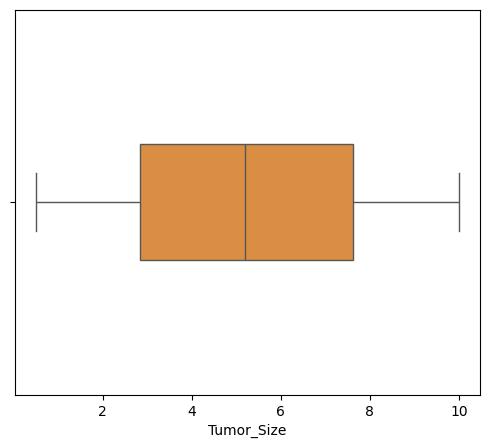

In [45]:
#check outliers and distribution of numerical features
plt.figure(figsize=(6, 5))  # width=4, height=3 (in inches)
sns.boxplot(x='Tumor_Size', data=df, width=0.3, color='#F28E2B')
plt.show()

#Tumor sizes are reasonably distributed, not heavily skewed, and no extreme values (e.g., abnormally large or tiny tumors).

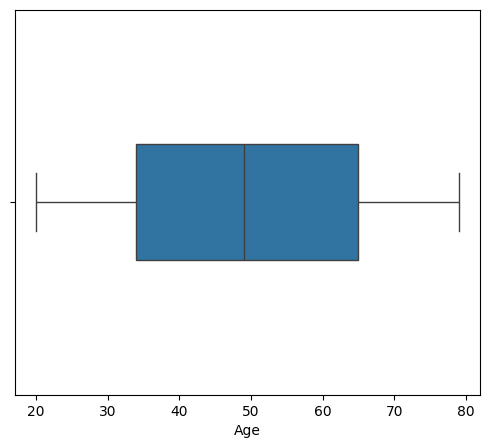

In [46]:
plt.figure(figsize=(6, 5))  # width=4, height=3 (in inches)
sns.boxplot(x='Age', data=df, width=0.3)
plt.show()

#Distribution is fairly normal (symmetric).

Histology
Glioblastoma       5068
Meningioma         5016
Medulloblastoma    4979
Astrocytoma        4937
Name: count, dtype: int64
Histology
Glioblastoma       25.340
Meningioma         25.080
Medulloblastoma    24.895
Astrocytoma        24.685
Name: proportion, dtype: float64


C:\Users\temisola\AppData\Local\Temp\ipykernel_17860\1189590602.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Histology', data=df, palette='crest')


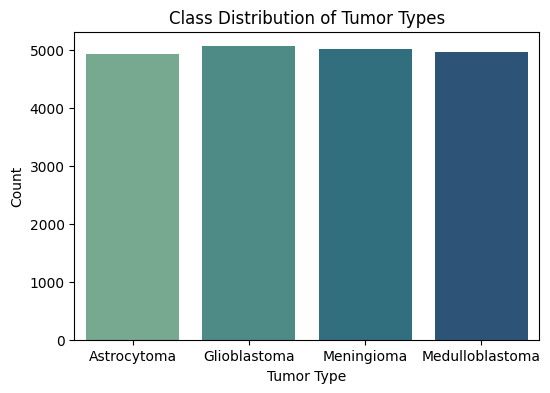

In [47]:
# Raw counts
print(df['Histology'].value_counts())  # Class distribution

# Percentages (proportion of total)
print(df['Histology'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6,4))
sns.countplot(x='Histology', data=df, palette='crest')
plt.title("Class Distribution of Tumor Types", fontsize=12)
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()

#check imbalanced classes

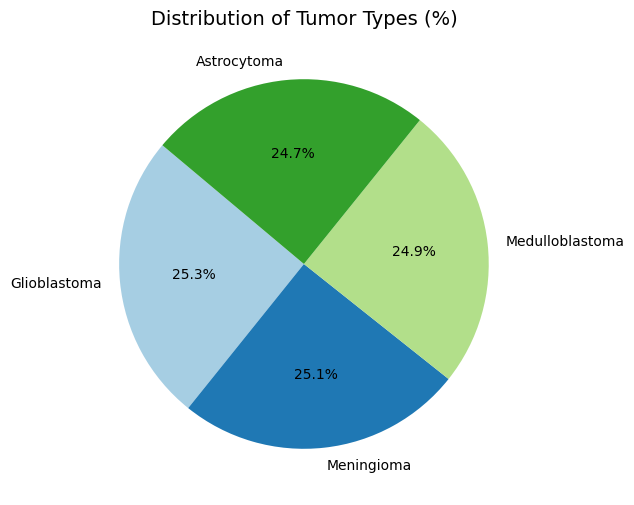

In [48]:
# Calculate class counts
class_counts = df['Histology'].value_counts()
class_percent = df['Histology'].value_counts(normalize=True) * 100

# Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(class_percent, 
        labels=class_percent.index, 
        autopct='%1.1f%%',     # show percentages with 1 decimal place
        startangle=140,        # rotate start position
        colors=plt.cm.Paired.colors)  # color palette

plt.title("Distribution of Tumor Types (%)", fontsize=14)
plt.show()

<Axes: >

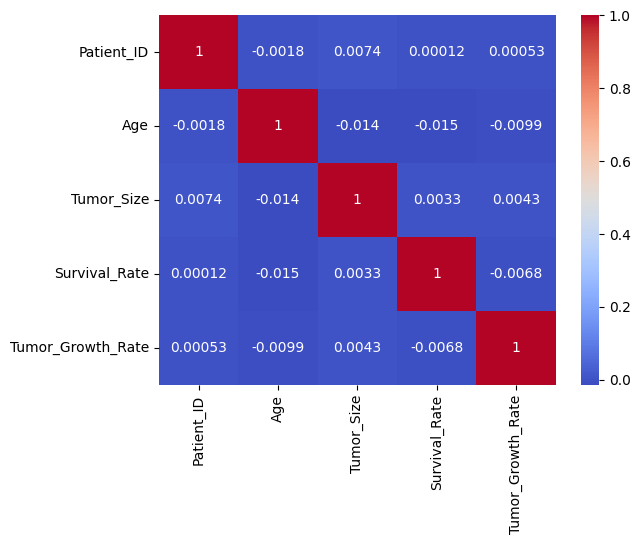

In [49]:
# Class distribution
sns.countplot(x='Tumor_Type', data=df)

# Correlation heatmap
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')



Gender by Histology
Gender           Female  Male
Histology                    
Astrocytoma        2488  2449
Glioblastoma       2520  2548
Medulloblastoma    2452  2527
Meningioma         2556  2460


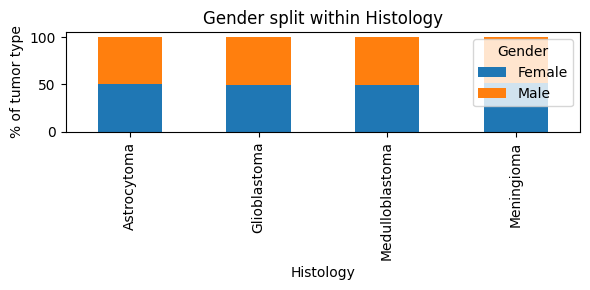


Location by Histology
Location         Frontal  Occipital  Parietal  Temporal
Histology                                              
Astrocytoma         1230       1238      1208      1261
Glioblastoma        1232       1277      1247      1312
Medulloblastoma     1218       1229      1274      1258
Meningioma          1245       1223      1261      1287


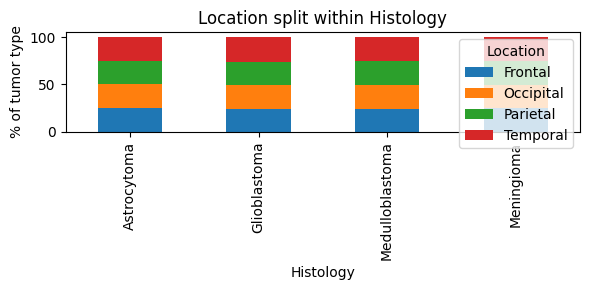


Stage by Histology
Stage               I    II   III    IV
Histology                              
Astrocytoma      1231  1246  1217  1243
Glioblastoma     1232  1280  1298  1258
Medulloblastoma  1243  1299  1201  1236
Meningioma       1280  1268  1237  1231


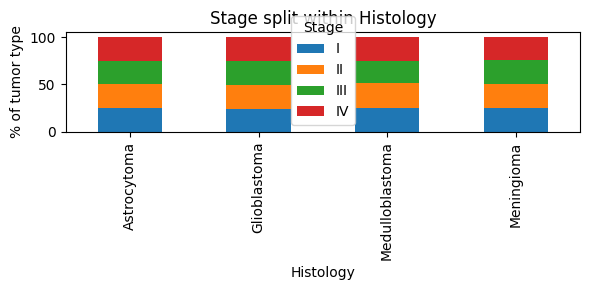


Symptom_1 by Histology
Symptom_1        Headache  Nausea  Seizures  Vision Issues
Histology                                                 
Astrocytoma          1221    1210      1217           1289
Glioblastoma         1287    1282      1232           1267
Medulloblastoma      1259    1235      1284           1201
Meningioma           1278    1242      1295           1201


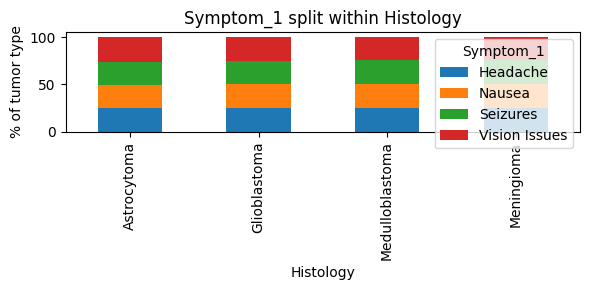


Symptom_2 by Histology
Symptom_2        Headache  Nausea  Seizures  Vision Issues
Histology                                                 
Astrocytoma          1220    1237      1256           1224
Glioblastoma         1273    1274      1266           1255
Medulloblastoma      1223    1215      1277           1264
Meningioma           1280    1205      1255           1276


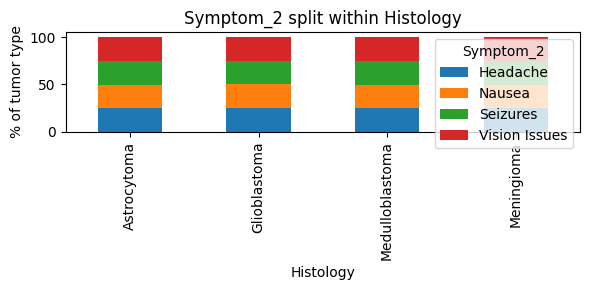


Symptom_3 by Histology
Symptom_3        Headache  Nausea  Seizures  Vision Issues
Histology                                                 
Astrocytoma          1251    1235      1255           1196
Glioblastoma         1274    1263      1247           1284
Medulloblastoma      1212    1267      1271           1229
Meningioma           1217    1247      1254           1298


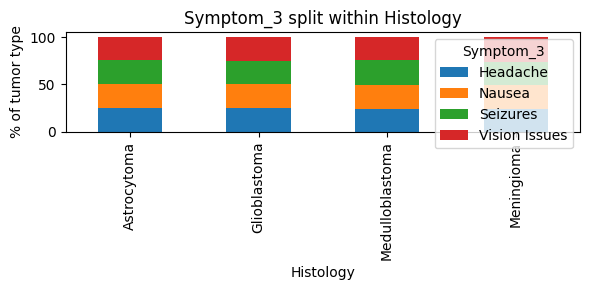


Radiation_Treatment by Histology
Radiation_Treatment    No   Yes
Histology                      
Astrocytoma          2490  2447
Glioblastoma         2491  2577
Medulloblastoma      2493  2486
Meningioma           2505  2511


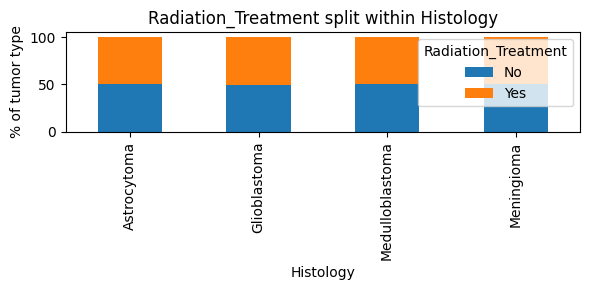


Surgery_Performed by Histology
Surgery_Performed    No   Yes
Histology                    
Astrocytoma        2430  2507
Glioblastoma       2531  2537
Medulloblastoma    2473  2506
Meningioma         2506  2510


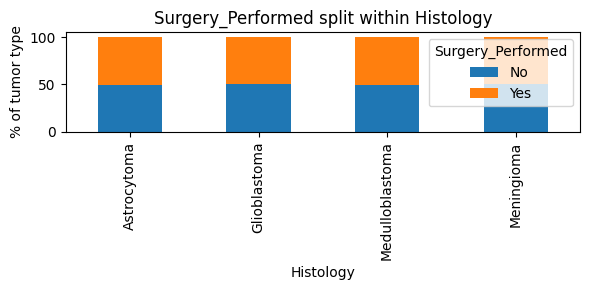


Chemotherapy by Histology
Chemotherapy       No   Yes
Histology                  
Astrocytoma      2435  2502
Glioblastoma     2536  2532
Medulloblastoma  2460  2519
Meningioma       2472  2544


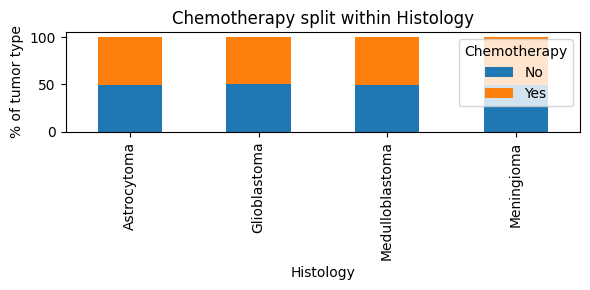


Family_History by Histology
Family_History     No   Yes
Histology                  
Astrocytoma      2410  2527
Glioblastoma     2548  2520
Medulloblastoma  2544  2435
Meningioma       2500  2516


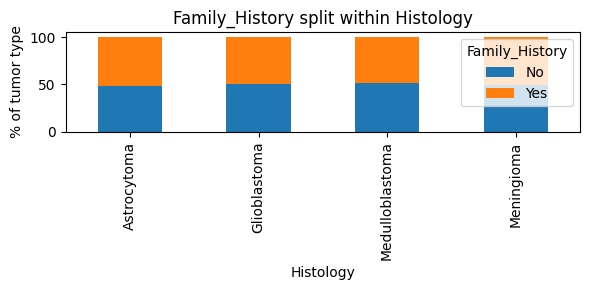


MRI_Result by Histology
MRI_Result       Negative  Positive
Histology                          
Astrocytoma          2534      2403
Glioblastoma         2489      2579
Medulloblastoma      2465      2514
Meningioma           2483      2533


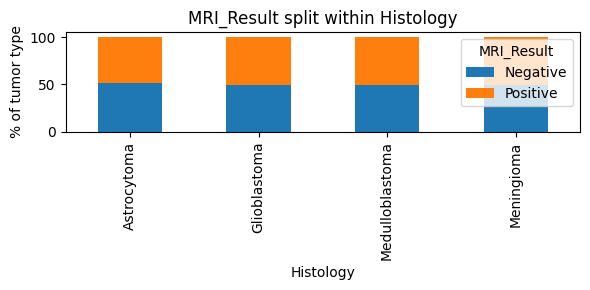


Follow_Up_Required by Histology
Follow_Up_Required    No   Yes
Histology                     
Astrocytoma         2431  2506
Glioblastoma        2533  2535
Medulloblastoma     2468  2511
Meningioma          2467  2549


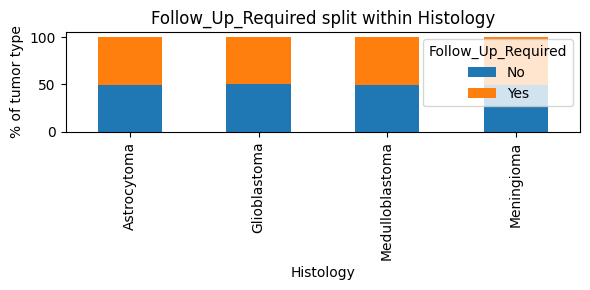

In [62]:
cat_cols = ['Gender','Location','Stage','Symptom_1','Symptom_2','Symptom_3',
            'Radiation_Treatment','Surgery_Performed','Chemotherapy',
            'Family_History','MRI_Result','Follow_Up_Required']
for col in cat_cols:
    vc = df.groupby(['Histology', col]).size().unstack(fill_value=0)
    print(f'\n{col} by Histology'); print(vc)
    (vc.div(vc.sum(axis=1), axis=0)*100).plot(kind='bar', stacked=True, figsize=(6,3),
                                              title=f'{col} split within Histology')
    plt.ylabel('% of tumor type'); plt.tight_layout(); plt.show()

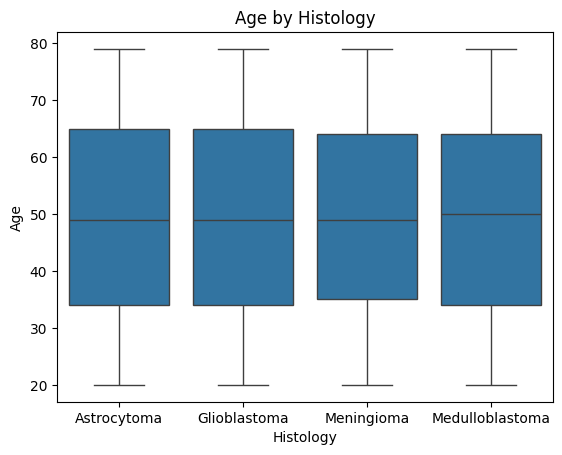

                  mean    std
Histology                    
Astrocytoma      49.45  17.47
Glioblastoma     49.28  17.57
Medulloblastoma  49.49  17.30
Meningioma       49.51  17.23


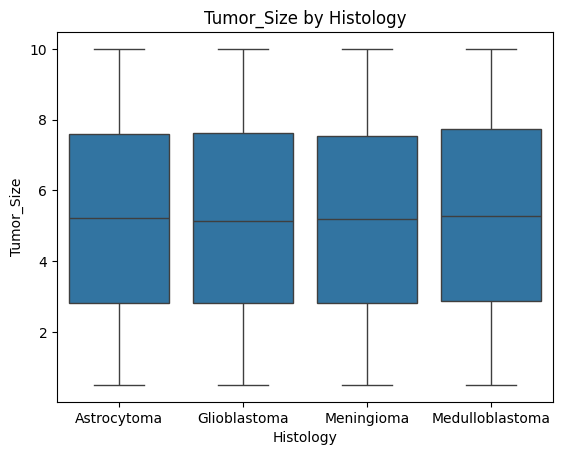

                 mean   std
Histology                  
Astrocytoma      5.23  2.76
Glioblastoma     5.20  2.76
Medulloblastoma  5.30  2.76
Meningioma       5.21  2.74


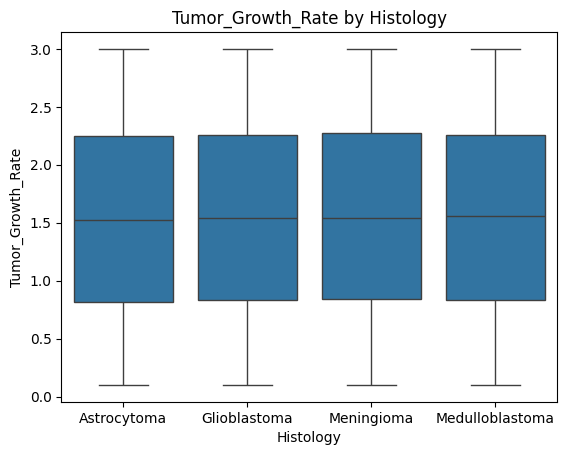

                 mean   std
Histology                  
Astrocytoma      1.54  0.84
Glioblastoma     1.55  0.84
Medulloblastoma  1.55  0.84
Meningioma       1.55  0.84


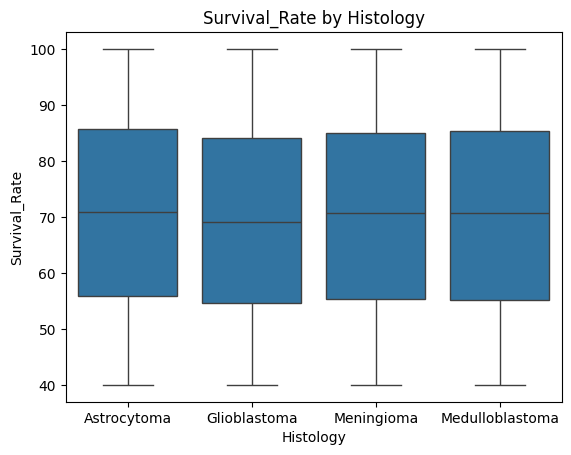

                  mean    std
Histology                    
Astrocytoma      70.55  17.34
Glioblastoma     69.44  17.21
Medulloblastoma  70.30  17.35
Meningioma       70.25  17.17


In [63]:
num_cols = ['Age','Tumor_Size','Tumor_Growth_Rate','Survival_Rate']
for col in num_cols:
    sns.boxplot(x='Histology', y=col, data=df)
    plt.title(f'{col} by Histology'); plt.show()
    print(df.groupby('Histology')[col].agg(['mean','std']).round(2))

In [50]:
# correlation of numeric features with target variable
df_corr = df.copy()

# encode the target ONLY for this EDA step
le = LabelEncoder()
y_num = pd.Series(le.fit_transform(df_corr['Histology']), index=df_corr.index, name='Histology_num')

# select numeric predictors only
num_cols = df_corr.select_dtypes(include='number').columns

# correlation of each numeric feature with the encoded target
corr_with_target = df_corr[num_cols].corrwith(y_num).sort_values(ascending=False)
print(corr_with_target)


# output shows there is no strong linear correlation between numeric features and target variable

Tumor_Growth_Rate    0.004425
Age                  0.002576
Tumor_Size           0.001451
Survival_Rate        0.000032
Patient_ID          -0.009851
dtype: float64


In [ ]:
le = LabelEncoder()
y = le.fit_transform(df['Histology'])

num_cols = df.select_dtypes(include='number').columns
X_num = df[num_cols]

Fvals, pvals = f_classif(X_num, y)
anova = pd.DataFrame({'feature': num_cols, 'F': Fvals, 'p_value': pvals}).sort_values('p_value')
print(anova)


             feature         F   p_value
3      Survival_Rate  3.860787  0.008972
2         Tumor_Size  1.480774  0.217528
0         Patient_ID  0.986677  0.397851
1                Age  0.183744  0.907498
4  Tumor_Growth_Rate  0.149097  0.930308


The rule of thumb in ANOVA:

If p < 0.05 → statistically significant difference between tumor types (the feature varies meaningfully by class).

If p ≥ 0.05 → no significant difference (that feature doesn’t differ much across tumor types).

Only Survival_Rate shows a statistically significant relationship with tumor type.
→ That feature likely contains useful diagnostic information for classification.

Most other features (Age, Tumor_Size, Growth_Rate) show no significant differences across classes.
→ They don’t help much individually — but may still be useful in combination.

Patient_ID is just an identifier, not a real predictor — you should drop it entirely from your feature set.

This pattern confirms your earlier heatmap observation:

“Individual numeric features don’t correlate strongly with tumor type; relationships are likely non-linear and multi-feature.”

In [61]:
for col in cat_cols:
    table = pd.crosstab(df[col], df['Histology'])
    chi2, p, _, _ = chi2_contingency(table)
    print(f'{col}: p={p:.4f}')

Gender: p=0.3368
Location: p=0.9500
Stage: p=0.8116
Symptom_1: p=0.2869
Symptom_2: p=0.8913
Symptom_3: p=0.6950
Radiation_Treatment: p=0.6231
Surgery_Performed: p=0.8709
Chemotherapy: p=0.8582
Family_History: p=0.1470
MRI_Result: p=0.1173
Follow_Up_Required: p=0.8466


“Individual features have low predictive power, and the problem likely requires multi-feature, non-linear modeling.”